<a href="https://colab.research.google.com/github/ioana0901/Sentiment-Analysis-on-Short-Texts-The-Case-of-the-Romanian-Language/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install import_ipynb

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Analiza sentimentelor umane a textelor din Limba Română"

In [ ]:
import import_ipynb
from FunctionsList import *
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

importing Jupyter notebook from FunctionsList.ipynb


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
reviews = pd.read_csv('Data/OriginalDataset.csv')
reviews.head()

,Unnamed: 0,phone_id,phone_name,review_score,review_title,review_content
0,0,DNJCMXMBM,"Telefon mobil Apple iPhone 13 Pro Max, 128GB, ...",5,Foarte multumit,WOW! Fără cuvinte… pur și simplu excepțional.
1,1,DDJCMXMBM,"Telefon mobil Apple iPhone 13 Pro Max, 128GB, ...",4,Ok,Incep prin a spune ca am precomandat telefonul...
2,2,DWFCMXMBM,"Telefon mobil Apple iPhone 13 Pro Max, 512GB, ...",5,Excelent,Sunt extraordinar de mulțumit de telefon.
3,3,DWFCMXMBM,"Telefon mobil Apple iPhone 13 Pro Max, 512GB, ...",5,Foarte multumit,"Intradevar este un telefon foarte scump, dar c..."
4,4,DRFCMXMBM,"Telefon mobil Apple iPhone 13 Pro Max, 1TB, 5G...",5,Exceptional,Detin un 13 pro max sierra 1tb din septembrie ...


In [ ]:
#sterge coloanele neimportante
reviews = reviews.iloc[: , 1:]
reviews.drop(columns=['phone_id','phone_name','review_title'], axis='columns',inplace=True)
reviews.head()

,review_score,review_content
0,5,WOW! Fără cuvinte… pur și simplu excepțional.
1,4,Incep prin a spune ca am precomandat telefonul...
2,5,Sunt extraordinar de mulțumit de telefon.
3,5,"Intradevar este un telefon foarte scump, dar c..."
4,5,Detin un 13 pro max sierra 1tb din septembrie ...


In [ ]:
#vezi daca lipsesc valori
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41928 entries, 0 to 41927
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_score    41928 non-null  int64 
 1   review_content  41927 non-null  object
dtypes: int64(1), object(1)
memory usage: 655.2+ KB


In [ ]:
#sterge randurile goale
reviews.dropna(subset=['review_content'], inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41927 entries, 0 to 41927
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_score    41927 non-null  int64 
 1   review_content  41927 non-null  object
dtypes: int64(1), object(1)
memory usage: 982.7+ KB


<Figure size 576x432 with 0 Axes>

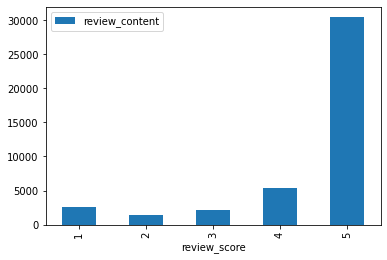

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
reviews.groupby('review_score').count().plot.bar(ylim=0)
plt.show()

In [ ]:
'''
- clasa 4 devine clasa neutra
- clasele 1, 2 si 3 devin negative si 5 pozitive
'''

'\n- clasa 4 devine clasa neutra\n- clasele 1, 2 si 3 devin negative si 5 pozitive\n'

In [ ]:
#modifica score column:  neg - 0 / neutru - 1 / pos - 2 
reviews["review_score"] = reviews["review_score"].apply(lambda x: 2 if x==5 else 1 if x==4 else 0)

In [ ]:
reviews.rename(columns={'review_score':'label'}, inplace = True)
#numara valorile din cele doua clase
reviews['label'].value_counts()

2    30438
0     6114
1     5375
Name: label, dtype: int64

In [ ]:
# sunt mult mai multe review-uri pozitive decat negative si neutre

# mai adauga o noua coloana cu numarul de cuvinte pentru recenzii pentru a pastra recenziile cele mai lungi pentru cazul pozitiv
reviews['review_length'] = reviews['review_content'].apply(lambda x: len(str(x).split(' ')))
reviews.head()

,label,review_content,review_length
0,2,WOW! Fără cuvinte… pur și simplu excepțional.,7
1,1,Incep prin a spune ca am precomandat telefonul...,173
2,2,Sunt extraordinar de mulțumit de telefon.,6
3,2,"Intradevar este un telefon foarte scump, dar c...",12
4,2,Detin un 13 pro max sierra 1tb din septembrie ...,80


In [ ]:
#echilibreaza datele -> sample by the lowest value

label_pos = reviews[reviews['label'] == 2]
label_pos = label_pos.sort_values(by=['review_length'], ascending=False).head(5375)

label_neg = reviews[reviews['label'] == 0]
label_neg = label_neg.sort_values(by=['review_length'], ascending=False).head(5375)

label_n = reviews[reviews['label'] == 1]

label_pos.reset_index(drop=True, inplace=True)
label_neg.reset_index(drop=True, inplace=True)
label_n.reset_index(drop=True, inplace=True)

In [ ]:
label_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5375 non-null   int64 
 1   review_content  5375 non-null   object
 2   review_length   5375 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 126.1+ KB


In [ ]:
#salveaza-le separat
data = pd.concat([label_pos,label_neg,label_n])
data

,label,review_content,review_length
0,2,Acest telefon m-a impresionat profund si mi-a ...,1818
1,2,Sunt la primul telefon OnePlus și mă declar pl...,1549
2,2,"Salutare!\n \n Dețin telefonul de câteva zile,...",1380
3,2,[AM TRIMIS SPRE APROBARE ACEASTA RECENZIE ACUM...,1255
4,2,"Nu l-am achizitionat prin eMag, asa ca nu apar...",1168
...,...,...,...
5370,1,"Il am de o saptamana si se misca super bine, v...",58
5371,1,"Mai ales ca am prins si 10% reducere, raport c...",164
5372,1,"M am saturat sa car caramizi in buzunar, l am ...",76
5373,1,Ok bun pana acuma recomand,6


<Figure size 576x432 with 0 Axes>

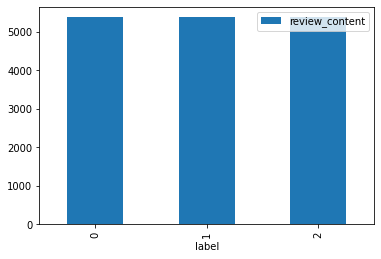

In [ ]:
fig = plt.figure(figsize=(8,6))
data[['label','review_content']].groupby('label').count().plot.bar(ylim=0)
plt.show()

In [ ]:
# pentru word2vec preantrenat -> elimin doar tag-urile, paranteze, numere, caractere extra si punctuatie
'''
data.drop(columns=['review_length'], axis='columns', inplace=True)
#capitalize
data['review_content'] = data['review_content'].apply(lambda x: x.capitalize())
#remove tags
data['review_content'] = data['review_content'].apply(lambda x: remove_tags(x))
#remove brackets
data['review_content'] = data['review_content'].apply(lambda x: remove_between_square_brackets(x))
#remove punctuation
data['review_content'] = data['review_content'].apply(lambda x: remove_punctuation(x))
#remove numbers
data['review_content'] = data['review_content'].apply(lambda x: remove_numbers(x))
#remove extra characters
data['review_content'] = data['review_content'].apply(lambda x: remove_extra_chars(x))
###### shuffle the data
data = shuffle(data)
data.reset_index(drop=True, inplace=True)
data.to_csv('Data/CleanDataset_for_PretrainedWord2Vec.csv')
data
'''

,label,review_content
0,0,"Un produs ok, insa pare sa fie pentru piata ar..."
1,0,Dupa o ora de folosire s a inchis... Definitiv...
2,2,Super calitate pentru pretul platit. Lipsesc s...
3,0,Nu ma așteptam să primesc adaptor de priză pen...
4,1,"Plusurile sunt evidente (butoane mari, ecran m..."
...,...,...
16120,2,"PRO: - Performanta de top(procesor foarte bun,..."
16121,0,"Amprenta functioneaza greu, are lag, bateria t..."
16122,1,"E bun telefonu, singuru minus, google services.."
16123,1,Pentru cine cauta o tableta de 7 inchi (ca si ...


In [ ]:
# pentru bert -> elimin doar tag-urile, paranteze,
'''
data.drop(columns=['review_length'], axis='columns', inplace=True)

#remove tags
data['review_content'] = data['review_content'].apply(lambda x: remove_tags(x))
#remove brackets
data['review_content'] = data['review_content'].apply(lambda x: remove_between_square_brackets(x))

###### shuffle the data
data = shuffle(data)
data.reset_index(drop=True, inplace=True)
data.to_csv('Data/CleanDataset_for_PretrainedWord2Vec.csv')
data



In [ ]:
#lowercase
data['review_content'] = data['review_content'].apply(lambda x: lowercase_text(x))
data.head()

,label,review_content,review_length
0,2,acest telefon m-a impresionat profund si mi-a ...,1818
1,2,sunt la primul telefon oneplus și mă declar pl...,1549
2,2,"salutare! dețin telefonul de câteva zile, timp...",1380
3,2,[am trimis spre aprobare aceasta recenzie acum...,1255
4,2,"nu l-am achizitionat prin emag, asa ca nu apar...",1168


In [ ]:
#sterge tags
data['review_content'] = data['review_content'].apply(lambda x: remove_tags(x))
data.head()

,label,review_content,review_length
0,2,acest telefon m-a impresionat profund si mi-a ...,1818
1,2,sunt la primul telefon oneplus și mă declar pl...,1549
2,2,"salutare! dețin telefonul de câteva zile, timp...",1380
3,2,[am trimis spre aprobare aceasta recenzie acum...,1255
4,2,"nu l-am achizitionat prin emag, asa ca nu apar...",1168


In [ ]:
#sterge punctuatie
data['review_content'] = data['review_content'].apply(lambda x: remove_punctuation(x))
data.head()

,label,review_content,review_length
0,2,acest telefon m a impresionat profund si mi a ...,1818
1,2,sunt la primul telefon oneplus și mă declar pl...,1549
2,2,salutare dețin telefonul de câteva zile timp s...,1380
3,2,am trimis spre aprobare aceasta recenzie acum...,1255
4,2,nu l am achizitionat prin emag asa ca nu apare...,1168


In [ ]:
#sterge paranteze
data['review_content'] = data['review_content'].apply(lambda x: remove_between_square_brackets(x))

In [ ]:
#sterge stopwords
data['review_content'] = data['review_content'].apply(lambda x: remove_stopwords(x))
data.head()

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar plăcut impresionat perf...,1549
2,2,salutare dețin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu l achizitionat emag nu apare achizitie veri...,1168


In [ ]:
#sterge numere
data['review_content'] = data['review_content'].apply(lambda x: remove_numbers(x))
data.head()

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar plăcut impresionat perf...,1549
2,2,salutare dețin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu l achizitionat emag nu apare achizitie veri...,1168


In [ ]:
#sterge caractere singure
data['review_content'] = data['review_content'].apply(lambda x: remove_single_letter(x))
data.head()

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar plăcut impresionat perf...,1549
2,2,salutare dețin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu achizitionat emag nu apare achizitie verifi...,1168


In [ ]:
#inlocuieste diacritice
data['review_content'] = data['review_content'].apply(lambda x: remove_accents(x))
data.head()

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar placut impresionat perf...,1549
2,2,salutare detin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu achizitionat emag nu apare achizitie verifi...,1168


In [ ]:
'''#remove special characters
data['review_content'] = data['review_content'].apply(lambda x: remove_special_characters(x))
data.head()'''

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar placut impresionat perf...,1549
2,2,salutare detin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu achizitionat emag nu apare achizitie verifi...,1168


In [ ]:
#sterge literele in plus din cuvinte
data['review_content'] = data['review_content'].apply(lambda x: remove_extra_chars(x))
data.head()

,label,review_content,review_length
0,2,telefon impresionat profund schimbat parerea h...,1818
1,2,telefon oneplus declar plăcut impresionat perf...,1549
2,2,salutare dețin telefonul zile timp suficient f...,1380
3,2,trimis aprobare recenzie acum cateva zile pres...,1255
4,2,nu achizitionat emag nu apare achizitie verifi...,1168


In [ ]:
# Tokenizare + Stemming 
data['review_content'] = data['review_content'].apply(lambda x: nltk.word_tokenize(x))
data['review_content'] = data['review_content'].apply(lambda x: [stemmer.stem(y) for y in x])
#inapoi la propozitii intregi
data['review_content'] = data['review_content'].apply(lambda x: " ".join(x))
data.head()

,label,review_content,review_length
0,2,telefon impresion profund schimbat parer huawe...,1818
1,2,telefon oneplus declar plăcut impresion perfor...,1549
2,2,salut dețin telefon zil timp suficient form pr...,1380
3,2,trimis aprob recenz acum catev zil presupun nu...,1255
4,2,nu achizition emag nu apar achizit verific fol...,1168


In [ ]:
data.drop(columns=['review_length'], axis='columns', inplace=True)

In [ ]:
###### shuffle the data
data = shuffle(data)
data.reset_index(drop=True, inplace=True)
data

,label,review_content
0,2,Acest telefon nu numai ca e foarte arătos și f...
1,0,"Telefonul este Top, însă nu are Google Play și..."
2,0,"Deci e oribil fraților... Merge foarte greu, s..."
3,1,"Performante modeste, sunet slab, in vodafone n..."
4,0,"Senzor proximitate cu probleme. La ureche, in ..."
...,...,...
16120,1,Ecranul putea sa aiba o calitate mai buna. Are...
16121,1,Un telefon foarte bun nu am avut pic de lag.. ...
16122,2,Excelent! Bateria ține sesizabil mai mult decâ...
16123,1,"Un telefon bun, raportat la preț. Recomand"


In [ ]:
data.to_csv('Data/Dataset.csv')

In [ ]:
data.isna().any()

label             False
review_content    False
dtype: bool